# 군집합(Clustering)
- 비지도학습으로 정답 없이 특징만 가지고, 보유한 데이터로 모델 구현 

In [1]:
import pandas as pd

df = pd.read_csv("../Data/student_kmeans.csv")
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


In [3]:
import warnings
warnings.filterwarnings("ignore")

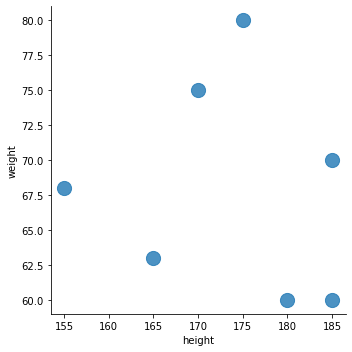

In [6]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    'height',
    "weight",
    data = df,
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":200}     # size
)
plt.show()

### k-means  군집화

In [7]:
# data
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [8]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    n_clusters = 3  ,#hyperparameter
).fit(data_points)

In [9]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[172.5       ,  77.5       ],
       [183.33333333,  63.33333333],
       [160.        ,  65.5       ]])

In [11]:
# kmeans의 라벨 칼럼 생성 
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


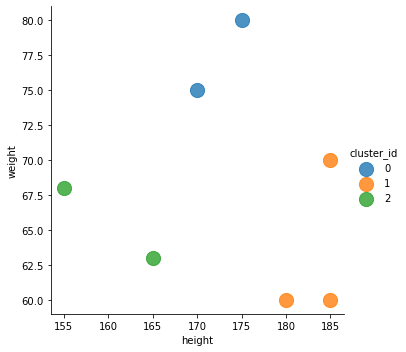

In [13]:
# 시각화
sns.lmplot(
    'height',
    "weight",
    data = df,
    hue= "cluster_id",  #구분 
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":200}     # size
)
plt.show()

---
# Iris 군집화 비교

In [14]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# name을 숫자로 바꾸기
iris['label'] = iris['Name'].map({'Iris-setosa':0, "Iris-versicolor":1,"Iris-virginica":2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [16]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### K-Means 군집화 

In [17]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
data_points = iris2.values
kmeans =KMeans(n_clusters=3).fit(data_points)

In [20]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [22]:
# 원데이터에 kmeans 라벨 넣기
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


### 시각화 해보기 
- iris의 label(정답), cluster_id(예측)이 값이 다르므로 시각화를 통해 확인이 필요

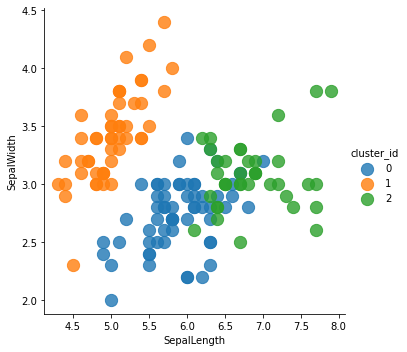

In [24]:
# 시각화
sns.lmplot(
    'SepalLength',
    "SepalWidth",
    data = iris,
    hue= "cluster_id",  #구분 
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":150}     # size
)
plt.show()

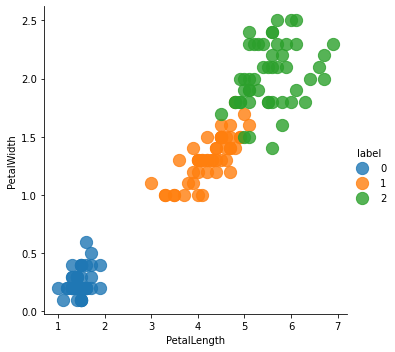

In [27]:
# 시각화 - label(정답)
sns.lmplot(
    'PetalLength',
    "PetalWidth",
    data = iris,
    hue= "label",  #구분 
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":150}     # size
)
plt.show()

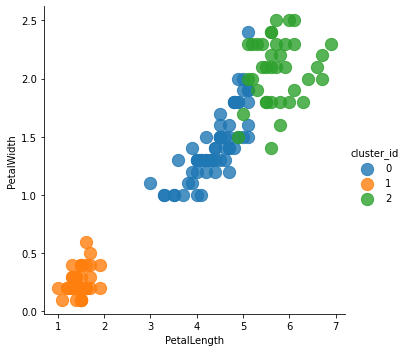

In [26]:
# 시각화 - cluster_id (예측)
sns.lmplot(
    'PetalLength',
    "PetalWidth",
    data = iris,
    hue= "cluster_id",  #구분 
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":150}     # size
)
plt.show()

In [31]:
# 매핑을 다시하여 kmeans 를 다시 정해준다. 
# 1=> 0 / 0 => 1 
iris['cluster_id2'] = iris['cluster_id'].map({1:0, 0:1,2:2})
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id,cluster_id2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0


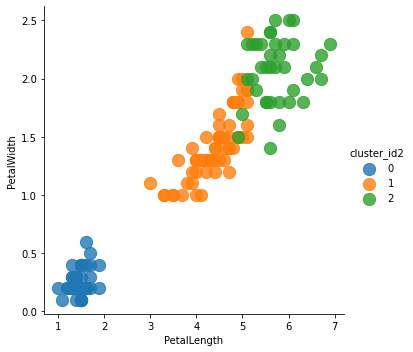

In [32]:
# label과 cluster_id2와 비교 
sns.lmplot(
    'PetalLength',
    "PetalWidth",
    data = iris,
    hue= "cluster_id2",  #구분 
    fit_reg=False,  # 회귀선 가리기 
    scatter_kws = {"s":150}     # size
)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
# 정확도
print("정확도(cluster_id):",accuracy_score(iris.label, iris.cluster_id))
# 매핑을 다시 할 때 
print("정확도(cluster_id2):",accuracy_score(iris.label, iris.cluster_id2))

정확도(cluster_id): 0.24
정확도(cluster_id2): 0.8933333333333333
